# Статистика, DS-поток
## Задание SP.6

Задача 1: ОМП для многомерного нормального.
▫️ Наличие решения. (70.0)
▫️ Один и тот же тип графика в pairplot. Комм. При рисовании pairplot по разные стороны от диагонали использован один и тот же тип графика, когда можно использовать два. (0.0)
▫️ Стоило разделить по цветам в зависимости от класса графики в pairplot. (0.0)
▫️ Плохие графики. Комм. Линии уровня сливаются с фоном, текст нечитаемый и т.п. Инд. комм. На графике "Плотность Nonflavanoid phenols и Hue" линии уровня плохо различимы (-10.0)
Баллы: 60.0 / 70.0

Задача 2: Исследование выбросов.
▫️ Пункт 1: наличие решения. (10.0)
▫️ Пункт 2: наличие решения. (20.0)
▫️ Пункт 3: наличие решения. (20.0)
▫️ Делается неправильный вывод о наличии выбросов по разнице между медианой и средним. Комм. Из-за особенностей некоторых распределений это не всегда одно и то же, такой вывод делать нельзя. Следовало сказать более осторожно: это кандидаты на выбросы, но однозначно утвержать это нельзя. (-10.0)
▫️ Вычисление медианы средних Уолша стоило вынести в отдельную функцию. (-2.0)
Баллы: 38.0 / 50.0

Задача 3: Доверительные интервалы параметра сдвига распределения Коши.
▫️ Пункт 1: наличие решения. (11.0)
▫️ Пункт 2: наличие решения. (63.0)
▫️ Пункт 3: наличие решения. (63.0)
▫️ Пункт 4: наличие решения. (63.0)
▫️ 3 пункт: Ошибка в построении ассимпт. дов. инт или его отсутствие. (-20.0)
Баллы: 180.0 / 200.0

Сумма: 278 / 320.0

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, palette='Set2')

______________
### Задача 1.
В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [2]:
data = pd.read_csv('wine.data', header=None)
data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols',
                'Flavanoids', 'Nonflavanoid phenols',
                'Proanthocyanins', 'Color intensity',
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

**Ответ:** 

$\widehat{a} = \frac{1}{n} \sum\limits_{i=1}^n X_i = \overline{X}$ <br>
$\widehat{\Sigma} = \frac{1}{n} \sum\limits_{i=1}^n (X_i - \overline{X})^T (X_i - \overline{X})$

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

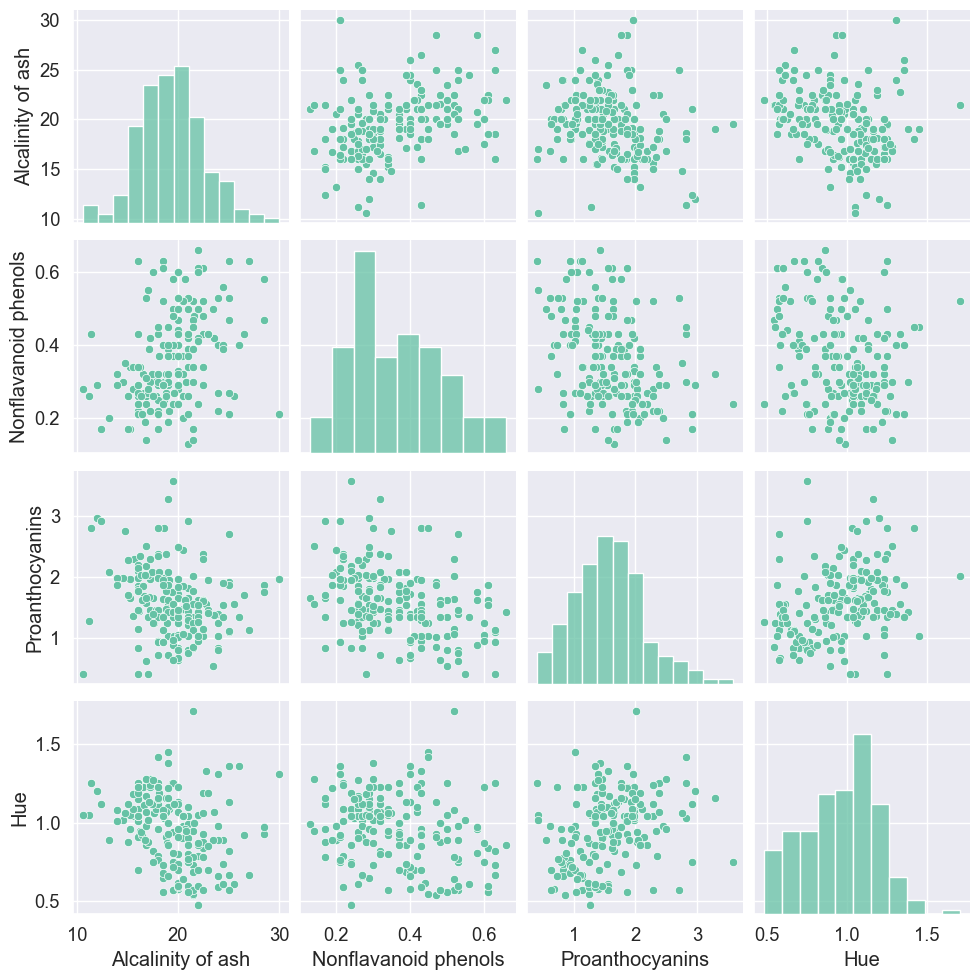

In [3]:
data = data[['Alcalinity of ash', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']]
sns.pairplot(data)


Действительно, напоминает нормальное распределение

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $a$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [7]:
def mle_for_mean(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для вектора средних
    '''
    
    return sample.mean(axis=0)

In [6]:
def mle_for_covariance_matrix(sample):
    '''
    :param sample: выборка из многомерного нормального распределения
    :return: ОМП для матрицы ковариаций
    '''
    n = sample.shape[0]
    return 1 / n * (sample - sample.mean(axis=0)).T @ \
     (sample - sample.mean(axis=0))

In [11]:
a = mle_for_mean(data)
sigma = mle_for_covariance_matrix(data)
a, sigma

(Alcalinity of ash       19.494944
 Nonflavanoid phenols     0.361854
 Proanthocyanins          1.590899
 Hue                      0.957449
 dtype: float64,
                       Alcalinity of ash  Nonflavanoid phenols  \
 Alcalinity of ash             11.090031              0.149577   
 Nonflavanoid phenols           0.149577              0.015402   
 Proanthocyanins               -0.375057             -0.025913   
 Hue                           -0.207943             -0.007429   
 
                       Proanthocyanins       Hue  
 Alcalinity of ash           -0.375057 -0.207943  
 Nonflavanoid phenols        -0.025913 -0.007429  
 Proanthocyanins              0.325754  0.038447  
 Hue                          0.038447  0.051951  )

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1. Точки выборки.

2. Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

*Указание.* Используйте функции `plt.pcolormesh` и `plt.clabel`

In [9]:
from scipy.stats import multivariate_normal
from itertools import combinations

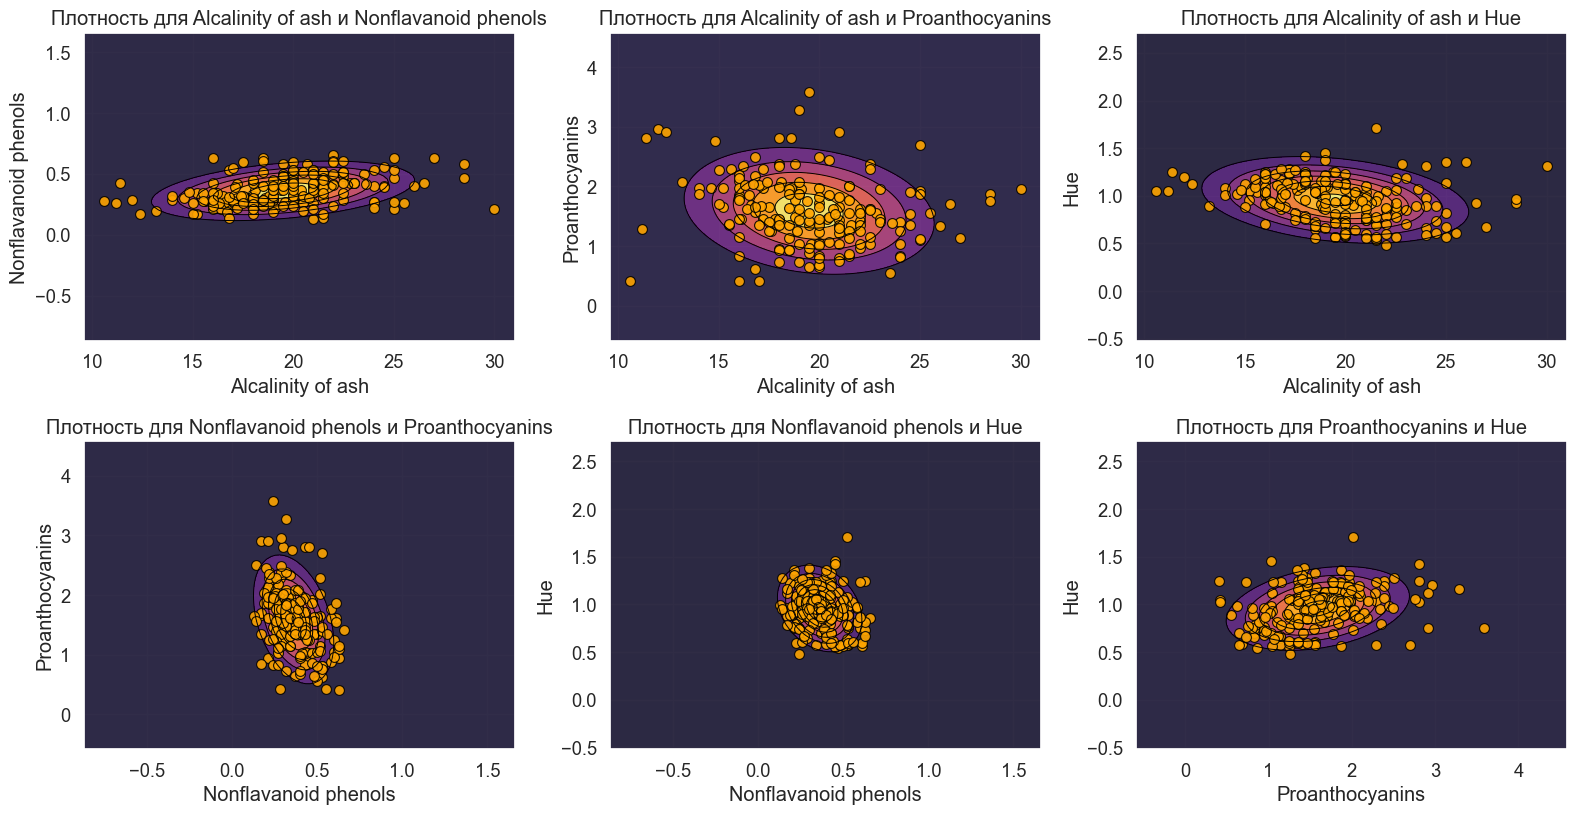

In [15]:
# Пары признаков
features = data.columns
pairs = list(combinations(features, 2))

plt.figure(figsize=(16, 16))
for i, (feature_x, feature_y) in enumerate(pairs, 1):
    # Выборка данных для текущей пары признаков
    subset = data[[feature_x, feature_y]]
    
    # Создание сетки для плотности
    x_min, x_max = subset[feature_x].min() - 1, subset[feature_x].max() + 1
    y_min, y_max = subset[feature_y].min() - 1, subset[feature_y].max() + 1
    x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    pos = np.dstack((x, y))
    
    # Параметры для двумерного нормального распределения
    mean_vector = a[[feature_x, feature_y]]
    cov_matrix = sigma.loc[[feature_x, feature_y], [feature_x, feature_y]].values
    
    # Расчет плотности
    rv = multivariate_normal(mean_vector, cov_matrix)
    density = rv.pdf(pos)
    
    # Построение графика
    ax = plt.subplot(4, 3, i)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.contourf(x, y, density, cmap='inferno', alpha=0.85) 
    plt.contour(x, y, density, colors='black', linewidths=0.7)
    plt.scatter(subset[feature_x], subset[feature_y], alpha=0.9, color='orange', s=50, edgecolor='black', marker='o', linewidth=0.8) 
    plt.title(f'Плотность для {feature_x} и {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    ax.set_aspect('auto')  
    plt.axis('tight')  

plt.tight_layout()
plt.show()


**Вывод:** 
Видно, что выборка хорошо ложится на нормальное распределение с оцененными параметрами

__________________
### Задача 2.

**1.** Загрузите <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/">данные</a>, которые содержат набор медицинских исследований, проведенных в рамках исследования о наличии у пациента сахарного диабета. Пациенты относятся к индейскому племени Пима.

In [16]:
diab_data = pd.read_csv('diabetes.csv')
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Выведите описательные статистики (метод `describe`) для всех признаков.  Округлите до второго знака после запятой.

In [17]:
diab_data.describe().applymap('{:.2f}'.format)

C:\Users\rusin\AppData\Local\Temp\ipykernel_19516\4169043588.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  diab_data.describe().applymap('{:.2f}'.format)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:**
Видим, что медиана сильно отличается от среднего в столбцах 
Glucose, BloodPressure, BMI, Age
В данных много выбросов

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует таргеты, а ось `y` — значениям параметра. Используйте функцию `seaborn.boxplot`.

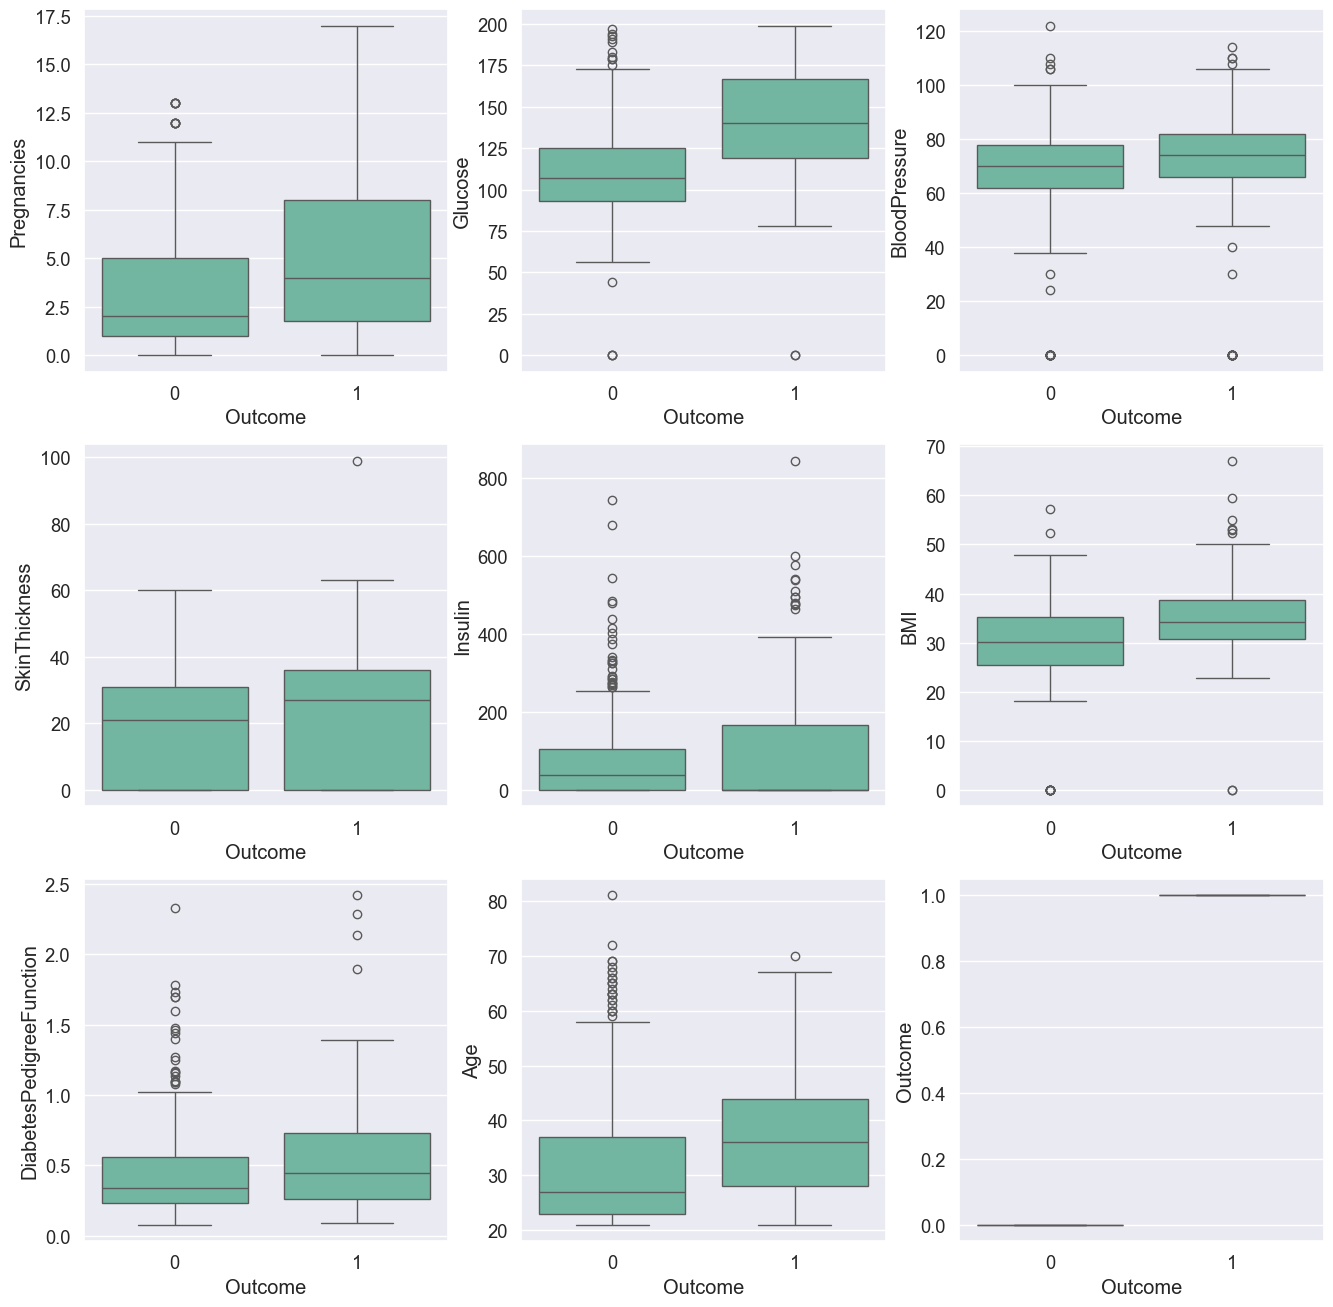

In [22]:
features = diab_data.columns

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
for k, feature in enumerate(features):
    i, j = np.unravel_index(k, (3, 3))
    sns.boxplot(x=diab_data['Outcome'], y=diab_data[feature], ax=ax[i, j])
plt.show()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**
Линия в ящике - медиана. Границы ящика - верхний и нижний квартиль. Усы - верхний и нижний квартиль +- полтора интерквартильных расстояния (или максимум/минимум по выборке, если он получается больше/меньше)

Видим, что выбросы есть во всех признаках, но больше всего в Insulin

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;
- медиану средних Уолша.

Для реализации медианы средних Уолша без циклов обратите внимание на следующие **подсказки**:
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?

Допустим, у нас есть вектор-строка 
1×𝑛 и вектор-столбец 𝑛×1. При сложении NumPy расширяет (broadcast) эти векторы, чтобы результатом стало сложение каждого элемента строки с каждым элементом столбца, получая матрицу размером 𝑛×𝑛.

2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`.

In [37]:
X = diab_data['Insulin'].to_numpy()
mean = X.mean()
median = np.median(X)

W = (X + X[:, None]) / 2
walsh = np.median(W[np.triu_indices_from(W)])

print(f"""
      Cреднее: {mean:.2f}, 
      Медиана: {median:.2f}, 
      Медиана средних Уолша: {walsh:.2f}""")


      Cреднее: 79.80, 
      Медиана: 30.50, 
      Медиана средних Уолша: 62.50


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** 
Медиана средних Уолша значительно ближе к среднему значению, чем обычная медиана, так как она является робастной оценкой, то есть устойчива к некоторому количеству выбросов

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

**Вывод:**
1. Робастные статистики полезны, когда набор данных содержит выбросы или не подчиняется стандартным предположениям, например, нормальности распределения. Такие статистики, как медиана Уолша, интерквартильный размах меньше подвержены влиянию экстремальных значений, а в реальном мире данные часто загрязнены ошибками измерений, человеческими факторами или редкими событиями. 

2. Визуализация данных позволяет:
- Быстро оценить распределение данных и наличие выбросов.
- Обнаружить скрытые взаимосвязи и зависимости, которые трудно выявить с помощью числовых методов.
- Понять многомерные и сложные структуры данных.
- Делать промежуточные выводы и выдвигать гипотезы, которые впоследствии можно проверить с помощью формальных статистических методов.

Однако визуализация может вводить в заблуждение, если не учитывать масштаб, оси и тип графика. Поэтому важно комбинировать методы визуального анализа с количественными методами для получения более точных и обоснованных выводов.

3. В реальном мире мы редко имеем дело с полностью i.i.d. величинами.
- Данные, полученные из социальных, финансовых, экономических или биологических систем, часто зависят от множества факторов. Например, цены акций или физиологические показатели у человека могут быть взаимосвязаны. Полностью независимые данные — редкость, так как даже случайные события часто имеют скрытые зависимости.
- Данные из реального мира могут следовать разным распределениям в зависимости от времени, условий или других факторов. Например, потребительское поведение может изменяться в зависимости от времени года или экономической ситуации. Это делает предположение об одинаковом распределении менее реалистичным.

______________
### Задача 3.

> *Указание.* При решении этой задачи посмотрите решения задач SP.2.3-4 и SP.3.1-2. Если потребуется, можно копировать код из своих решений этих задач или решений, которые выложены на вики.

Предлагается изучить свойства оценок параметра сдвига для распределения Коши, обладающего плотностью $$p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}.$$

> Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.
>
> В анализе данных такое распределение применяться для получения робастных процедур.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

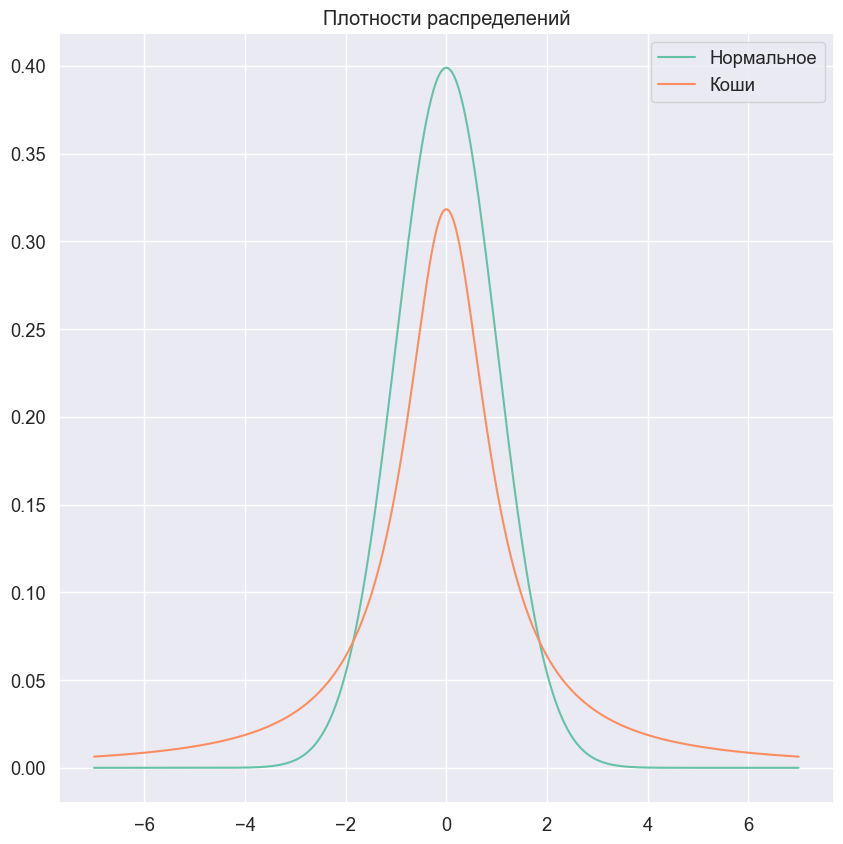

In [38]:
x = np.linspace(-7, 7, 1000)
plt.figure(figsize=(10, 10))
plt.plot(x, sps.norm().pdf(x), label='Нормальное')
plt.plot(x, sps.cauchy().pdf(x), label='Коши')
plt.legend()
plt.title('Плотности распределений')
plt.show()

**Вывод:** 
Распределение Коши, как известно, обладает более тяжелыми хвостами, из-за чего у него нет матожидания.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

Расчеты см пдф файле

C:\Users\rusin\AppData\Local\Temp\ipykernel_19516\3981858331.py:3: RuntimeWarning: invalid value encountered in divide
  sigma = ((1/np.tan(np.pi * a) - np.arctan(1/np.tan(np.pi * a))) / np.pi + a * u**2)  * 2 / (1 - 2*a) ** 2


(0.0, 10.0)

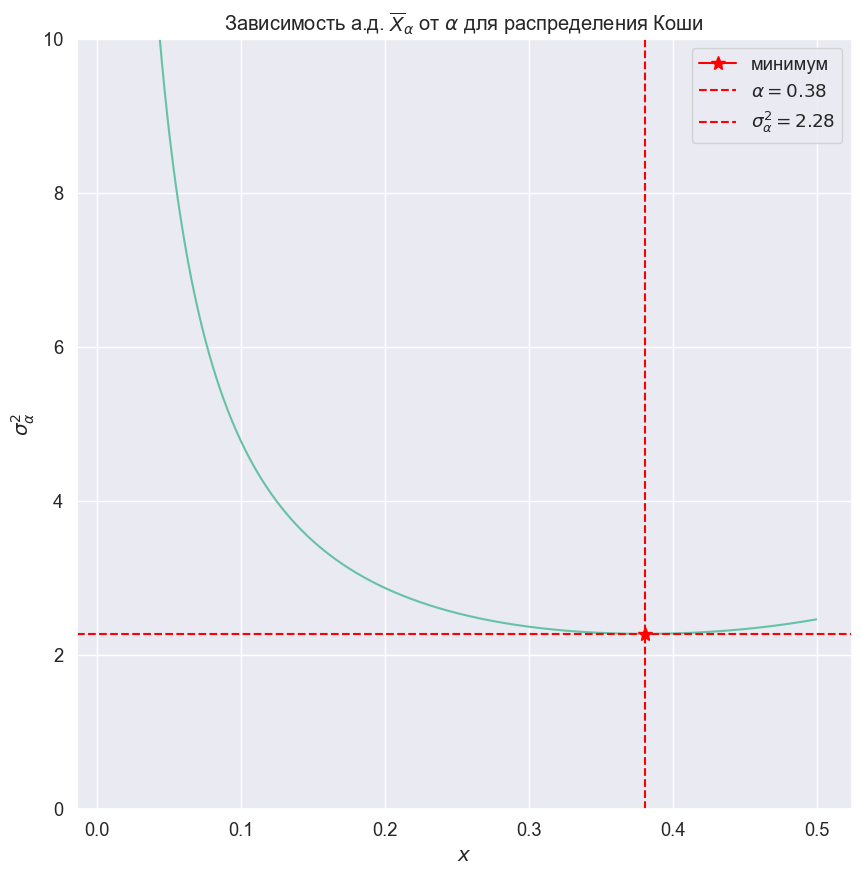

In [46]:
a = np.linspace(0.01, 0.5, 1000)
u = np.tan(np.pi*(0.5 - a))
sigma = ((1/np.tan(np.pi * a) - np.arctan(1/np.tan(np.pi * a))) / np.pi + a * u**2)  * 2 / (1 - 2*a) ** 2

plt.figure(figsize=(10, 10))
plt.plot(a, sigma)
plt.plot(a[np.nanargmin(sigma)], np.nanmin(sigma), marker='*', color='red', markersize=10, label=f'минимум')
plt.title('Зависимость а.д. $\overline{X}_{\\alpha}$ от $\\alpha$ для распределения Коши')
plt.xlabel('$x$')
plt.ylabel('$\\sigma^2_{\\alpha}$')
plt.axvline(x=a[np.nanargmin(sigma)], linestyle='--', color='red', label='$\\alpha=0.38$')
plt.axhline(y=np.nanmin(sigma), linestyle='--', color='red', label='$\\sigma^2_\\alpha=2.28$')
plt.legend()
plt.ylim(0, 10)

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ и вывод:** 
минимум достигается при $\alpha=0.38$

Усеченное среднее — полезный метод для анализа распределений с тяжелыми хвостами, таких как распределение Коши. В отличие от обычного среднего, оно имеет ограниченную асимптотическую дисперсию при достаточном усечении, что позволяет избежать проблем с неограниченной дисперсией и делать более устойчивые выводы из данных.

**3.** 
Сгенерируйте выборку $X_1, ... X_{200}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев:

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя
    * выборочную медиану;
    * усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$;
    * выборочную медиану;
    * медиану средних Уолша;
    * любую асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечания.*
1. Первый случай призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.
2. Производите отладку кода на малых числах.
3. Если не успеваете до дедлайна, можете сократить количество вариантов, потеряв при этом некоторую часть баллов.


**Решение:**

* Точный интервал для $\mathcal{N}(\theta, 1)$:
 $[\overline{X}\pm z_\frac{1+\alpha}{2}\frac{1}{\sqrt{n}}]$

* $\widehat\mu$ а.н.о. $\theta$ с ас. дисп. $\sigma^2 = \frac{\pi^2}{4}$. 

Ас. интервал Вальда: $[\widehat\mu\pm z_\frac{1+\alpha}{2}\frac{\sigma}{\sqrt{n}}]$

* $\overline{X}_{\alpha}$ а.н.о. $\theta$ с ас. дисп. $\sigma^2_{\alpha} = (\frac{\text{ctg}(\pi\alpha) - \text{arctg}(\text{ctg}(\pi\alpha))}{\pi} + \alpha\text{ctg}(\pi\alpha)^2)\frac{2}{(1-2\alpha)^2}$, где $\alpha=0.38$. 

Ас. интервал Вальда:  $[\widehat\mu\pm z_\frac{1+\alpha}{2}\frac{\sigma_{\alpha}}{\sqrt{n}}]$

* $W$ а.н.о. $\theta$ с ас. дисп. $\sigma^2 = \frac{\pi^2}{3}$. 

Ас. интервал Вальда: $[\widehat\mu\pm z_\frac{1+\alpha}{2}\frac{\sigma}{\sqrt{n}}]$

* Ас. эффективная оценка: одношаговая оценка от медианы $\widehat\mu_1$ а.н.о. $\theta$ с ас. дисп. $i(\theta)^{-1} = 2$

In [47]:
def normal_interval(X, alpha=0.95):
    n_range = np.arange(X.shape[0]) + 1

    mean = X.cumsum(axis=-1) / n_range
    sigma = 1

    u = sps.norm().ppf((1+alpha)/2)
    left = mean - u * sigma / np.sqrt(n_range)
    right = mean + u * sigma / np.sqrt(n_range)

    return left, right, mean

In [49]:
def median_interval(X, alpha=0.95):
    n_range = np.arange(X.shape[0]) + 1
    median = np.array([np.median(X[:i]) for i in n_range])

    sigma = np.pi / 2
    u = sps.norm().ppf((1+alpha)/2)
    left = median - u * sigma / np.sqrt(n_range)
    right = median + u * sigma / np.sqrt(n_range)

    return left, right, median

In [50]:
def truncated_mean_interval(X, alpha=0.95):
    n_range = np.arange(X.shape[0]) + 1

    a = 0.38
    p_sigma = np.tan(np.pi*(0.5 - a))
    
    mean = np.array([sps.stats.trim_mean(X[:i], proportiontocut=a) for i in n_range])

    sigma = np.sqrt(((1/np.tan(np.pi * a) - np.arctan(1/np.tan(np.pi * a))) / np.pi + a * p_sigma**2)  * 2 / (1 - 2*a) ** 2)

    u = sps.norm().ppf((1+alpha)/2)
    left = mean - u * sigma / np.sqrt(n_range)
    right = mean + u * sigma / np.sqrt(n_range)

    return left, right, mean

In [51]:
def walsh_interval(X, alpha=0.95):
    n_range = np.arange(X.shape[0]) + 1

    walsh = []

    for i in n_range:
        W = (X[:i] + X[:i, None]) / 2
        walsh.append(np.median(W[np.triu_indices_from(W)]))
        
    sigma = np.sqrt(np.pi ** 2 / 3)

    u = sps.norm().ppf((1+alpha)/2)
    left = walsh - u * sigma / np.sqrt(n_range)
    right = walsh + u * sigma / np.sqrt(n_range)

    return left, right, walsh

In [54]:
def one_step_interval(X, alpha=0.95):
    n_range = np.arange(X.shape[0]) + 1

    median = np.array([np.median(X[:i]) for i in n_range])
    est = np.copy(median)
    
    dx1 = np.array([((X[:i] - est[i-1]) / (1 + (X[:i] - est[i-1]) ** 2)).sum() for i in n_range])
    dx2 = np.array([((1 - (X[:i] - est[i-1]) ** 2) / (1 + (X[:i] - est[i-1]) ** 2) ** 2).sum() 
                    for i in n_range])
    est += dx1 / dx2
    
    sigma = np.sqrt(2)

    u = sps.norm().ppf((1+alpha)/2)
    left = est - u * sigma / np.sqrt(n_range)
    right = est + u * sigma / np.sqrt(n_range)

    return left, right, est

C:\Users\rusin\AppData\Local\Temp\ipykernel_19516\2298128616.py:7: DeprecationWarning: Please use `trim_mean` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  mean = np.array([sps.stats.trim_mean(X[:i], proportiontocut=a) for i in n_range])


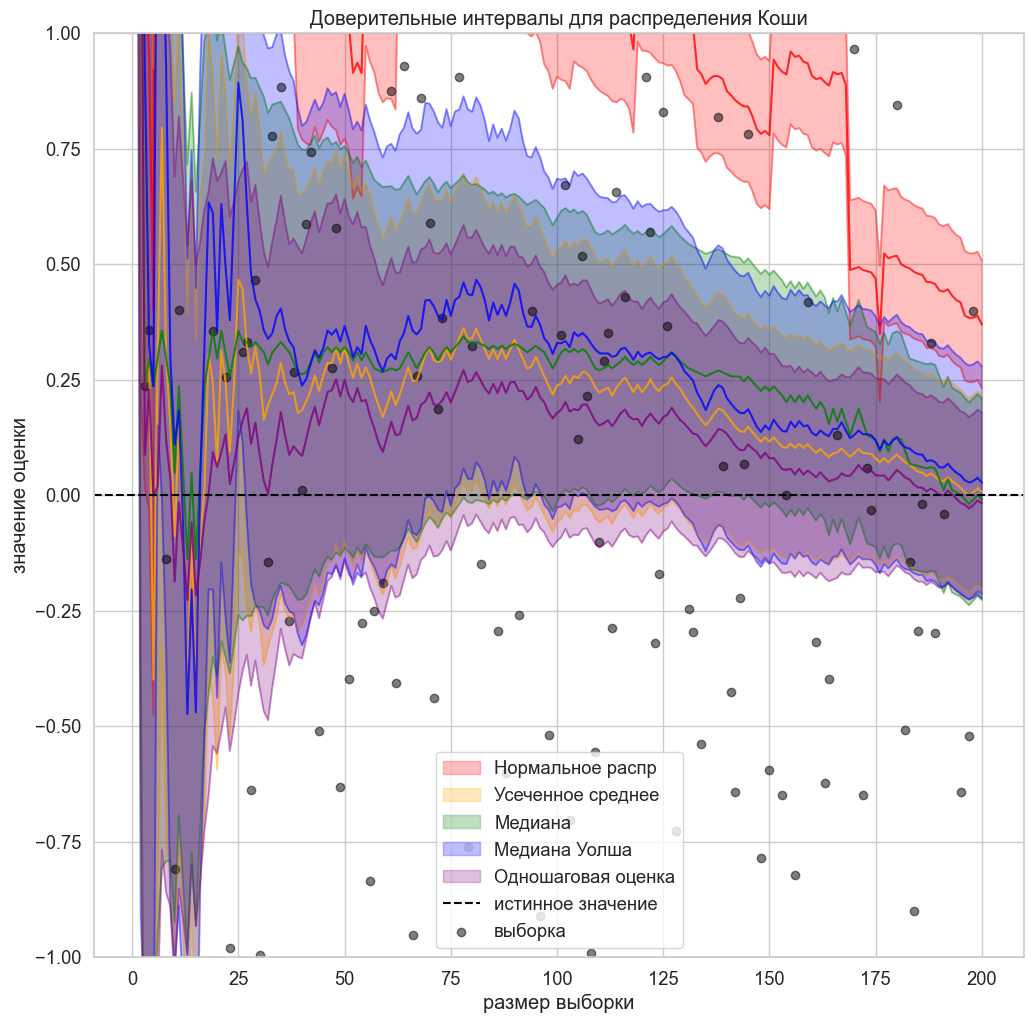

In [55]:
sample = sps.cauchy().rvs(size=200)
intervals = {'Нормальное распр': (normal_interval, 'red'),
             'Усеченное среднее': (truncated_mean_interval, 'orange'),
             'Медиана': (median_interval, 'green'),
            'Медиана Уолша': (walsh_interval, 'blue'), 
            'Одношаговая оценка': (one_step_interval, 'purple')}

n_range = np.arange(sample.shape[0]) + 1

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 12))
    for name, interv in intervals.items():
        left, right, est = interv[0](sample)
        plt.plot(n_range, est, alpha=0.8, color=interv[1])
        plt.plot(n_range, left, alpha=0.3, color=interv[1])
        plt.plot(n_range, right, alpha=0.3, color=interv[1])
        plt.fill_between(n_range.squeeze(), left.squeeze(), right.squeeze(), alpha=0.25, label=name, color=interv[1])

    plt.axhline(0, linestyle='--', label='истинное значение', color='black')
    plt.scatter(n_range, sample, alpha=0.5, label='выборка', color='black')
    plt.ylim(-1, 1)
    plt.legend()
    plt.xlabel('размер выборки')
    plt.ylabel('значение оценки')
    plt.title('Доверительные интервалы для распределения Коши')

**Вывод:** 
Интервал для нормального распределения практически не покрывает истинное значение.
Остальные покрывают, для медианы Уолша он смещен вверх и при размере выборки 125 не покрывает. Но по мере увеличения размера выборки опускается ниже и все ок.
Одношаговая оценка, действительно, обладает самым узким интервалом

**4.** Сравните все исследуемые интервалы по величине доли покрытия истинного значения $\theta$, а также по средней длине интервала. Сравнение проведите для всех размеров выборки от 1 до 200 включительно. 

*Замечания.*
1. Производите отладку кода на малых числах.
2. Нужно выполнить достаточное количество семплирований выборок, не менее 1000.
3. Если код работает больше часа, разрешается проводить сравнение для размеров выборок по сетке с некоторым шагом, больше 1. При этом сделайте замеры времени выполнения ячеек с помощью `%%time`.
4. Если не успеваете до дедлайна, можете сократить количество перебираемых вариантов, потеряв при этом некоторую часть баллов.

**Решение:**

In [71]:
sample_sizes = np.arange(5, 201, 5) 
n_simulations = 1000 
theta_true = 0

C:\Users\rusin\AppData\Local\Temp\ipykernel_19516\2298128616.py:7: DeprecationWarning: Please use `trim_mean` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  mean = np.array([sps.stats.trim_mean(X[:i], proportiontocut=a) for i in n_range])


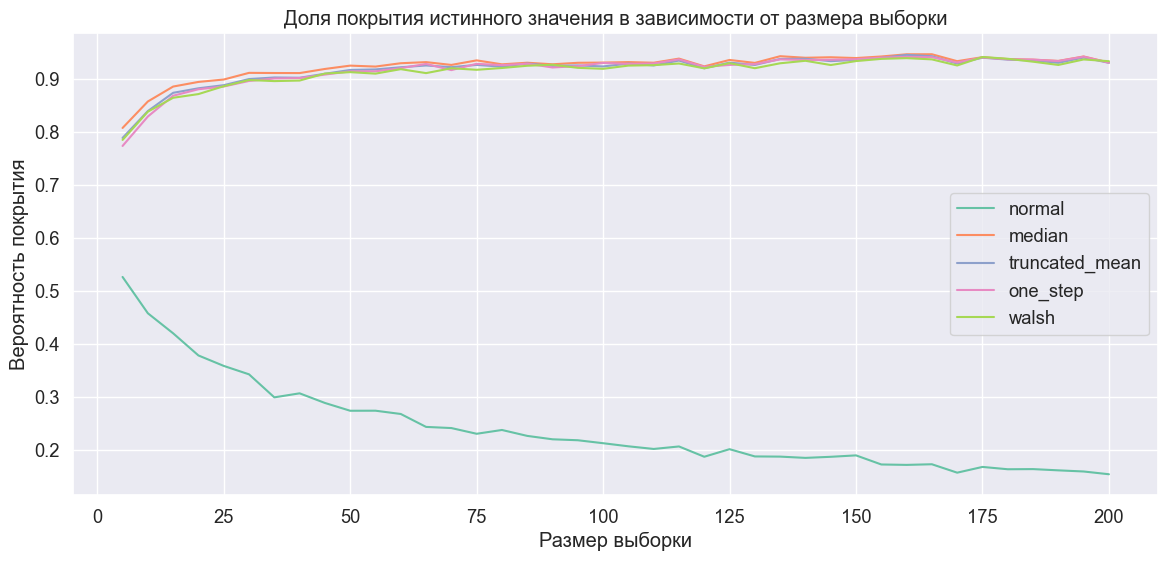

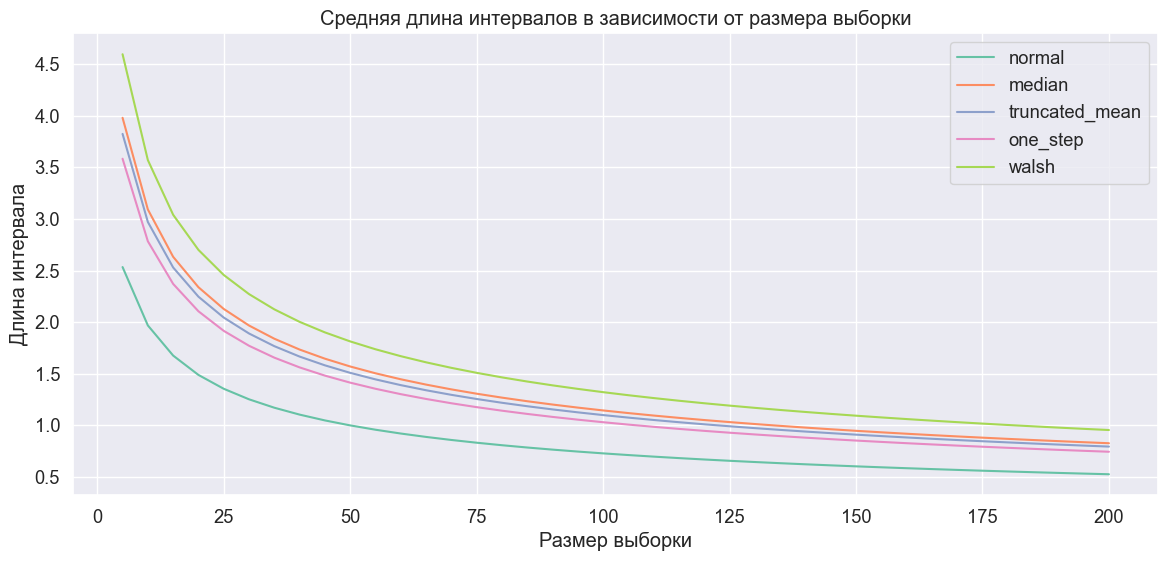

In [72]:
def plot_results(coverage_results, length_results, sample_sizes):
    # Покрытие интервалов
    plt.figure(figsize=(14, 6))
    for method in coverage_results:
        plt.plot(sample_sizes, coverage_results[method], label=method)
    plt.title('Доля покрытия истинного значения в зависимости от размера выборки')
    plt.xlabel('Размер выборки')
    plt.ylabel('Вероятность покрытия')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Средняя длина интервалов
    plt.figure(figsize=(14, 6))
    for method in length_results:
        plt.plot(sample_sizes, length_results[method], label=method)
    plt.title('Средняя длина интервалов в зависимости от размера выборки')
    plt.xlabel('Размер выборки')
    plt.ylabel('Длина интервала')
    plt.legend()
    plt.grid(True)
    plt.show()


coverage_results = {method: [] for method in ['normal', 'median', 'truncated_mean', 'one_step', 'walsh']}
length_results = {method: [] for method in ['normal', 'median', 'truncated_mean', 'one_step', 'walsh']}

for n in sample_sizes:
    X_samples = sps.cauchy().rvs(size=(n_simulations, n))

    for method, interval_fn in zip(
        ['normal', 'median', 'truncated_mean', 'one_step', 'walsh'],
        [normal_interval, median_interval, truncated_mean_interval, one_step_interval, walsh_interval]):
        left_bounds = []
        right_bounds = []

        for sam in X_samples:
            interval = interval_fn(sam)
            left_bounds.append(interval[0])
            right_bounds.append(interval[1])

        left_bounds = np.array([left_bounds])
        right_bounds = np.array([right_bounds])

        # Проверка покрытия и средней длины
        coverage = ((left_bounds <= theta_true) & (right_bounds >= theta_true)).mean()
        interval_length = (right_bounds - left_bounds).mean()

        # Сохранение данных для текущего размера выборки
        coverage_results[method].append(coverage)
        length_results[method].append(interval_length)

# Построение графиков
plot_results(coverage_results, length_results, sample_sizes)



**Вывод:** 
Доля покрытия у всех методов (кроме нормального) практически одинаковая, около 95%.
Средняя длина интервала у нормального самая маленькая, но он все равно не покрывает истинный параметр, так что радоваться нечему.
У медианы Уолша самый широкий интервал, затем практически не отличаются обычная медиана, усеченное среднее и одношаговая оценка. 
У всех оценок интервал уменьшается по мере увеличения выборки, что логично, он же асимптотический.